# Public sentiments for COVID-19 tweets

## Importing the required modules

In [47]:
import os
import re
import random
import string

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [48]:
## setting nltk
# ! pip install nltk
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\m7070\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
## loading the data set
## data file path
data = "/NLP/Basic/covid_tweets.csv"
## reading the data
data = pd.read_csv(data)

In [50]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [51]:
data['Sentiment'].unique()

array(['Extremely Negative', 'Positive', 'Extremely Positive', 'Negative',
       'Neutral'], dtype=object)

The labels in the data are ['Extremely Negative' 'Positive' 'Extremely Positive' 'Negative' 'Neutral']
The count of each label is Sentiment
Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: count, dtype: int64


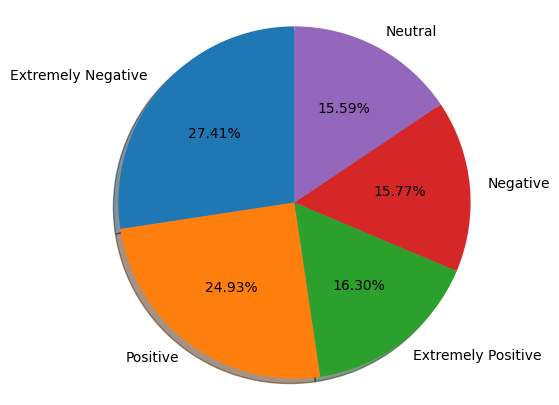

In [52]:
## tweets disterbution
def pie_chart(dataframe):
    ## labels
    labels = dataframe['Sentiment'].unique().astype(str)
    print(f"The labels in the data are {labels}")
    
    ## label count
    label_counts = dataframe['Sentiment'].value_counts()
    print(f"The count of each label is {label_counts}")
    
    sizes = [count for count in label_counts]
    
    ## plotting the pie chart
    fig = plt.figure(figsize=(5,5))
    
    plt.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    
    plt.axis('equal')
    
    plt.show()
    
                              
pie_chart(data)

In [53]:
## Seperating positive and negative tweets
positive_tweets = list(data[data['Sentiment'] == "Positive"]['OriginalTweet'].astype(str))
negative_tweets = list(data[data['Sentiment'] == "Negative"]['OriginalTweet'].astype(str))

In [54]:
## splitting the data into train and test
positive_train, positive_test = train_test_split(positive_tweets, test_size=0.2, random_state=42)
negative_train, negative_test = train_test_split(negative_tweets, test_size=0.2, random_state=42)

## print sizes
print(f"Size of training data: {len(positive_train) + len(negative_train)}")
print(f"Size of testing data: {len(positive_test) + len(negative_test)}")

Size of training data: 1589
Size of testing data: 399


In [55]:
print('\033[92m' + 'Postivite tweets are in green:')
print('\033[92m' + f'{positive_tweets[random.randint(0, 947)]}')

Postivite tweets are in green:
@SadhguruJV Saar, @SriSri Sir @yogrishiramdev ji 
I am looking for some gyaan please. You guys have spoken on Economy, Value of Indian rupees Vs US Dollar, Petrol prices, Politics, Social issues. 
Anything on #CoronavirusPandemic
#CoronaOutbreak 



In [56]:
print('\033[91m' +  'Negative tweets are in red:')
print('\033[91m' + f'{negative_tweets[random.randint(0, 947)]}')

Negative tweets are in red:
In USA people are stabbing each other over the last package of water bottles in the grocery store. In Australia there is a shortage of toilet paper. In Fiji? The chili sauce isle is empty #coronavirus


## Tokenizing the tweets

In [57]:
## splitting the tweets into words
tweet = positive_tweets[12]
words = tweet.split()
print(words)

['Consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus.', 'https://t.co/5mYfz3RAD0', '#retail', '#ecommerce', '#study', '#coronavirus', 'https://t.co/Dz3H6zrWUT']


In [58]:
## removing punctuations
## seperating punctuations (getting words)
tokens = re.split(r'\W+', tweet)
print(tokens)

['Consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus', 'https', 't', 'co', '5mYfz3RAD0', 'retail', 'ecommerce', 'study', 'coronavirus', 'https', 't', 'co', 'Dz3H6zrWUT']


In [59]:
## Tokenizing using nltk
from nltk import word_tokenize
tokens = word_tokenize(tweet)
print(tokens)

['Consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus', '.', 'https', ':', '//t.co/5mYfz3RAD0', '#', 'retail', '#', 'ecommerce', '#', 'study', '#', 'coronavirus', 'https', ':', '//t.co/Dz3H6zrWUT']


In [60]:
## Sentence tokenization
splits= tweet.split('. ')
print(f"Using normal split: {splits}")

sentence_splits = re.compile('[.!?] ').split(tweet)
print(f"Using regex split: {sentence_splits}")

Using normal split: ['Consumers have increased their online shopping due to coronavirus', 'https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT']
Using regex split: ['Consumers have increased their online shopping due to coronavirus', 'https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT']


In [61]:
## nltk sentence tokenization
from nltk import sent_tokenize
sentence_tokens = sent_tokenize(tweet)
print(f"Using nltk: {sentence_tokens}")

Using nltk: ['Consumers have increased their online shopping due to coronavirus.', 'https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT']


In [62]:
## removing hyperlinks and hashtags
tweet2 = re.sub(r'RT[\s]+', '', tweet)
tweet2= re.sub(r'https?://[^\s\n\r]+', '', tweet2)
tweet2 = re.sub(r'#', '', tweet2)
print(tweet2)

Consumers have increased their online shopping due to coronavirus.  retail ecommerce study coronavirus 


## Reducing dataset size

In [63]:
from nltk.corpus import stopwords ## for english stopwords
from nltk.corpus import twitter_samples ## sample twitter dataset from nltk
from nltk.stem import PorterStemmer ## for stemming
from nltk.tokenize import TweetTokenizer

In [64]:
tweet = positive_tweets[15]
tweet

'Hi all! Please support your local Chinese Restaurant &amp; order some delicious food from them ? They are really struggling with the #COVID2019 panic, many are having to let staff go.\r\r\n\r\r\nMy favs in #Manchester are @sweetmandarin &amp; @blueeyedpandam4\r\r\nThank you! ??\r\r\n\r\r\n#iwilleatwithyou https://t.co/jpDHxQMBTv'

## Tokenizer

In [65]:
## Tokenizing the tweet
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

tweet_tokens = tokenizer.tokenize(tweet)

print(f"Tokenized string: {tweet_tokens}")

Tokenized string: ['hi', 'all', '!', 'please', 'support', 'your', 'local', 'chinese', 'restaurant', '&', 'order', 'some', 'delicious', 'food', 'from', 'them', '?', 'they', 'are', 'really', 'struggling', 'with', 'the', '#covid2019', 'panic', ',', 'many', 'are', 'having', 'to', 'let', 'staff', 'go', '.', 'my', 'favs', 'in', '#manchester', 'are', '&', 'thank', 'you', '!', '?', '?', '#iwilleatwithyou', 'https://t.co/jpDHxQMBTv']


In [66]:
nltk.download('stopwords')

stopwords_english = stopwords.words('english')

punctuations = string.punctuation

clean_tweet = []

for word in tweet_tokens:
    if (word not in stopwords_english and word not in punctuations):
        clean_tweet.append(word)

print(f"Cleaned tweet: {clean_tweet}")

Cleaned tweet: ['hi', 'please', 'support', 'local', 'chinese', 'restaurant', 'order', 'delicious', 'food', 'really', 'struggling', '#covid2019', 'panic', 'many', 'let', 'staff', 'go', 'favs', '#manchester', 'thank', '#iwilleatwithyou', 'https://t.co/jpDHxQMBTv']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m7070\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Stemming and lemmitization

In [67]:
def process_tweets(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    punctuations = string.punctuation
    tweet = re.sub(r'\$\w*', '', tweet) ## removing stock market tickers
    tweet = re.sub(r'^RT[\s]+', '', tweet) ## removing old style retweet text
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet) ## removing hyperlinks
    tweet = re.sub(r'#', '', tweet) ## removing hashtags
    
    ## Tokenizing the tweet
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    
    ## removing stopwords and punctuations
    tweets_clean = []
    
    for tweet in tweet_tokens:
        if (tweet not in stopwords_english and tweet not in punctuations):
            stem_word = stemmer.stem(tweet)
            tweets_clean.append(stem_word)
    
    return tweets_clean

In [68]:
tweet = positive_tweets[35]

tweet_step = process_tweets(tweet)

print(f"Original tweet: {tweet}")
print(f"Processed tweet: {tweet_step}")

Original tweet: Well, its time to stock up on cat food. #coronavirus #quarantine #pandemic https://t.co/uhfmQPZWAt
Processed tweet: ['well', '\x92', 'time', 'stock', 'cat', 'food', 'coronaviru', 'quarantin', 'pandem']


## Training the model

In [69]:
## word frequency dictionary

def build_frq(tweets, ys):
    ## labels of sentiments (1, 0)
    yslist = np.squeeze(ys).tolist()
    
    ## dictionary of words and their frequencies
    frq = {}
    
    ## looping over tweets and labels
    for y, tweet in zip(yslist, tweets):
        for word in process_tweets(tweet):
            pair = (word, y)
            if pair in frq:
                frq[pair] += 1
            else:
                frq[pair] = 1
    
    return frq

In [70]:
training_tweets = positive_train + negative_train

In [71]:
labels = np.append(np.ones((len(positive_train), 1)), np.zeros((len(negative_train), 1)), axis=0)

In [72]:
labels

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [73]:
## Create frquency dictionary
frqs = build_frq(training_tweets, labels)

In [74]:
## testing the function
keys = ['void', 'commun', 'spirit', 'stop', 'merit', 'nice', 'good', 'bad', 'mad', 'best', 'pretti', ':)',':(', 'song', 'idea', 'power', 'play']

In [75]:
data = []

## loop through each word
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    ## retrieve number of positive counts
    if (word, 1) in frqs:
        pos = frqs[(word, 1)]
        
    if (word, 0) in frqs:
        neg = frqs[(word, 0)]
        
    data.append([word, pos, neg])

In [76]:
data

[['void', 1, 0],
 ['commun', 15, 11],
 ['spirit', 1, 1],
 ['stop', 14, 28],
 ['merit', 0, 0],
 ['nice', 6, 5],
 ['good', 49, 28],
 ['bad', 1, 9],
 ['mad', 2, 8],
 ['best', 7, 3],
 ['pretti', 6, 4],
 [':)', 1, 1],
 [':(', 3, 0],
 ['song', 2, 0],
 ['idea', 6, 7],
 ['power', 5, 0],
 ['play', 8, 1]]

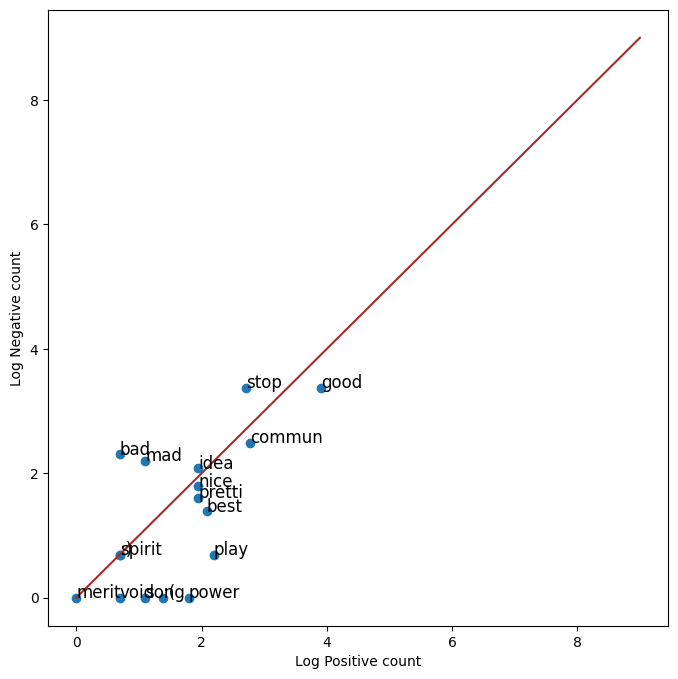

In [77]:
fig, ax = plt.subplots(figsize=(8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data])

# plot a dot for each pair of words
ax.scatter(x, y)

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range (0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)
    
ax.plot([0,9], [0, 9], color = 'brown')
plt.show()

## Extracting features function

In [78]:
def extract_features(tweet, freqs):
    
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweets(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3))
    
    ## bias term is set to 1
    x[0,0] = 1
    
    ## loop through each word in the list of words
    for word in word_l:
        
        ## increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0), 0)
        
        ## increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0), 0)  
    
    assert(x.shape == (1, 3))
    
    return x

## Feature extraction

In [79]:
train_x = training_tweets
temp1 = extract_features(train_x[0], frqs)
print(temp1)

[[1.000e+00 2.284e+03 2.568e+03]]


## Feature extraction for a random string

In [80]:
temp2 = extract_features('This batch is the best batch.', frqs)
print(temp2)

[[ 1. 11.  3.]]


## Preparing training data

In [81]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))

for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], frqs)

# training labels corresponding to X
train_y = np.append(np.ones((len(positive_train), 1)), np.zeros((len(negative_train), 1)), axis=0)
Y = np.ravel(train_y, order='C')

## Using the most basic model to classify the tweets

In [83]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, Y)

print(f"Training accuracy: {clf.score(X, Y)}")

Training accuracy: 0.7004405286343612


In [84]:
## Check performance on the test set
testing_tweets = positive_test + negative_test

test_x = np.zeros((len(testing_tweets), 3))

for i in range(len(testing_tweets)):
    test_x[i, :]= extract_features(testing_tweets[i], frqs)

## training labels corresponding to X
test_y = np.append(np.ones((len(positive_test), 1)), np.zeros((len(negative_test), 1)), axis=0)
test_y = np.ravel(test_y, order='C')

print(f"Test accuracy: {clf.score(test_x, test_y)}")

Test accuracy: 0.5764411027568922


## Predict whether a tweet is positive or negative

In [85]:
def predict_tweet(tweet, freqs):
    
    ## extracting features
    x = extract_features(tweet, freqs)
    
    ## making prediction
    y_pred = clf.predict(x)
    
    return y_pred

In [86]:
## testing the function
testing_tweet = [
            'Thank god corona is over!',
            'This is seriously ridiculous. Stop boarding',
            'Panic buying is pushing beyond the need to secure essentials.',
            'The stock market is crashing and the world is in a panic.',
            'Thank you to all the nurses and doctors working tirelessly to help those affected by the coronavirus.'
        ]

for tweet in testing_tweet:
    sentiment = predict_tweet(tweet, frqs)
    
    print(f"Tweet: {tweet} \nSentiment: {sentiment}\n")
    

Tweet: Thank god corona is over! 
Sentiment: [1.]

Tweet: This is seriously ridiculous. Stop boarding 
Sentiment: [0.]

Tweet: Panic buying is pushing beyond the need to secure essentials. 
Sentiment: [0.]

Tweet: The stock market is crashing and the world is in a panic. 
Sentiment: [0.]

Tweet: Thank you to all the nurses and doctors working tirelessly to help those affected by the coronavirus. 
Sentiment: [1.]



## Conclusion
- Lemmatization is not enough.
- Adding BoW with Logistic Regression will imporove the result significantly. 